## Dataset Analysis and Pre-Processing

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer


In [15]:
dataset = pd.read_csv("pediatric_appendicitis.csv", delimiter=';')
updated_dataset = pd.DataFrame(dataset)
updated_dataset = updated_dataset.loc[:, ~updated_dataset.columns.str.startswith('Unnamed')]
updated_dataset.describe()

Age         BMI      Height      Weight  Length_of_Stay   
count  781.000000  755.000000  756.000000  779.000000      778.000000  \
mean    11.346451   18.907012  148.017460   43.172542        4.284062   
std      3.529909    4.385331   19.732016   17.390984        2.574057   
min      0.000000    7.830000   53.000000    3.960000        1.000000   
25%      9.200000   15.725000  137.000000   29.500000        3.000000   
50%     11.440000   18.060000  149.650000   41.400000        3.000000   
75%     14.100000   21.180000  163.000000   54.000000        5.000000   
max     18.360000   38.160000  192.000000  103.000000       28.000000   

       Alvarado_Score  Paedriatic_Appendicitis_Score  Appendix_Diameter   
count      730.000000                     730.000000         498.000000  \
mean         5.921918                       5.253425           7.762651   
std          2.155972                       1.958456           2.536671   
min          0.000000                       0.000000           2.700000   
25%          4.000000                       4.000000           6.000000   
50%          6.000000                       5.000000           7.500000   
75%          8.000000                       7.000000           9.100000   
max         10.000000                      10.000000          17.000000   

       Body_Temperature   WBC_Count  Neutrophil_Percentage   
count        775.000000  776.000000             679.000000  \
mean          37.404516   12.670683              71.791163   
std            0.903678    5.366525              14.463656   
min           26.900000    2.600000              27.200000   
25%           36.800000    8.200000              61.400000   
50%           37.200000   12.000000              75.500000   
75%           37.900000   16.200000              83.600000   
max           40.200000   37.700000              97.700000   

       Segmented_Neutrophils   RBC_Count  Hemoglobin         RDW   
count              54.000000  764.000000  764.000000  756.000000  \
mean               64.929630    4.799490   13.380497   13.180291   
std                15.085025    0.499012    1.393271    4.538774   
min                32.000000    3.620000    8.200000   11.200000   
25%                54.500000    4.537500   12.600000   12.300000   
50%                64.500000    4.780000   13.300000   12.700000   
75%                77.500000    5.020000   14.000000   13.300000   
max                91.000000   14.000000   36.000000   86.900000   

       Thrombocyte_Count         CRP   US_Number  
count         764.000000  771.000000  760.000000  
mean          285.252618   31.386900  425.515789  
std            72.494373   57.433854  271.585211  
min            91.000000    0.000000    1.000000  
25%           236.000000    1.000000  198.750000  
50%           276.000000    7.000000  398.500000  
75%           330.000000   33.000000  613.250000  
max           708.000000  365.000000  992.000000

In [16]:
updated_dataset.head()

Age   BMI     Sex  Height  Weight  Length_of_Stay    Management   
0  12.68  16.9  female   148.0    37.0             3.0  conservative  \
1  14.10  31.9    male   147.0    69.5             2.0  conservative   
2  14.14  23.3  female   163.0    62.0             4.0  conservative   
3  16.37  20.6  female   165.0    56.0             3.0  conservative   
4  11.08  16.9  female   163.0    45.0             3.0  conservative   

        Severity Diagnosis_Presumptive        Diagnosis  Alvarado_Score   
0  uncomplicated          appendicitis     appendicitis             4.0  \
1  uncomplicated          appendicitis  no appendicitis             5.0   
2  uncomplicated          appendicitis  no appendicitis             5.0   
3  uncomplicated          appendicitis  no appendicitis             7.0   
4  uncomplicated          appendicitis     appendicitis             5.0   

   Paedriatic_Appendicitis_Score Appendix_on_US  Appendix_Diameter   
0                            3.0            yes                7.1  \
1                            4.0             no                NaN   
2                            3.0             no                NaN   
3                            6.0             no                NaN   
4                            6.0            yes                7.0   

  Migratory_Pain Lower_Right_Abd_Pain Contralateral_Rebound_Tenderness   
0             no                  yes                              yes  \
1            yes                  yes                              yes   
2             no                  yes                              yes   
3            yes                  yes                               no   
4             no                  yes                              yes   

  Coughing_Pain Nausea Loss_of_Appetite  Body_Temperature  WBC_Count   
0            no     no              yes              37.0        7.7  \
1            no     no              yes              36.9        8.1   
2            no     no               no              36.6       13.2   
3            no    yes              yes              36.0       11.4   
4           yes    yes              yes              36.9        8.1   

   Neutrophil_Percentage  Segmented_Neutrophils Neutrophilia  RBC_Count   
0                   68.2                    NaN           no       5.27  \
1                   64.8                    NaN           no       5.26   
2                   74.8                    NaN           no       3.98   
3                   63.0                    NaN           no       4.64   
4                   44.0                    NaN           no       4.44   

   Hemoglobin   RDW  Thrombocyte_Count Ketones_in_Urine RBC_in_Urine   
0        14.8  12.2              254.0               ++            +  \
1        15.7  12.7              151.0               no           no   
2        11.4  12.2              300.0               no           no   
3        13.6  13.2              258.0               no           no   
4        12.6  13.6              311.0               no           no   

  WBC_in_Urine  CRP Dysuria         Stool Peritonitis Psoas_Sign   
0           no  0.0      no        normal          no        yes  \
1           no  3.0     yes        normal          no        yes   
2           no  3.0      no  constipation          no        yes   
3           no  0.0     yes        normal          no        yes   
4           no  0.0      no  constipation          no        yes   

  Ipsilateral_Rebound_Tenderness US_Performed  US_Number Free_Fluids   
0                             no          yes      882.0          no  \
1                             no          yes      883.0          no   
2                             no          yes      884.0          no   
3                             no          yes      886.0          no   
4                             no          yes      887.0          no   

  Appendix_Wall_Layers Target_Sign Appendicolith Perfusion Perforation   
0               intact

Text(0, 0.5, 'Frequency')

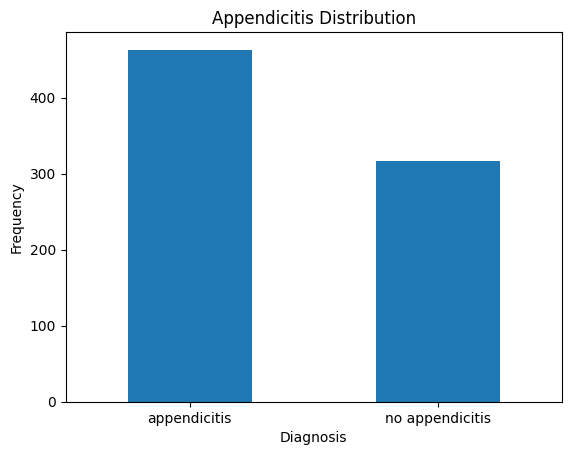

In [17]:
appendicitis_counter = pd.value_counts(updated_dataset['Diagnosis'], sort = True)

appendicitis_counter.plot(kind = 'bar', rot=0)

plt.title("Appendicitis Distribution")

LABELS = ["appendicitis", "no appendicitis"]

plt.xticks(range(2), LABELS)

plt.xlabel("Diagnosis")

plt.ylabel("Frequency")

In [18]:
#erase all output columns except the diagnosis one
updated_dataset.drop('Severity', axis=1, inplace=True)
updated_dataset.drop('Management', axis=1, inplace=True)
updated_dataset.drop('Diagnosis_Presumptive', axis=1, inplace=True)

In [19]:
#if having <NA> and NaN causes problems, just remove the astype("Int64") conversions

#binarization
#Peritonitis
mapping = {"no" : 0, "local" : 1, "generalized" : 2}
updated_dataset["Peritonitis"] = updated_dataset["Peritonitis"].replace(mapping).astype("Int64")
one_hot = pd.get_dummies(updated_dataset['Peritonitis'], prefix='Peritonitis', dtype=int)
#updated_dataset.drop('Peritonitis', axis=1, inplace=True)
updated_dataset = pd.concat([updated_dataset, one_hot], axis=1)


#Stool
dummies = pd.get_dummies(updated_dataset['Stool'], prefix='Stool', dtype=int)
updated_dataset = pd.concat([updated_dataset, dummies], axis=1)
updated_dataset.drop('Stool', axis=1, inplace=True)

#Ketones_in_Urine
mapping = {"no" : 0, '+' : 1, "++" : 2, "+++": 3}
updated_dataset["Ketones_in_Urine"] = updated_dataset["Ketones_in_Urine"].replace(mapping).astype("Int64")
one_hot = pd.get_dummies(updated_dataset['Ketones_in_Urine'], prefix='Ketones_in_Urine', dtype=int)
#updated_dataset.drop('Ketones_in_Urine', axis=1, inplace=True)
updated_dataset = pd.concat([updated_dataset, one_hot], axis=1)


#RBC_in_Urine
mapping = {"no" : 0, '+' : 1, "++" : 2, "+++": 3}
updated_dataset["RBC_in_Urine"] = updated_dataset["RBC_in_Urine"].replace(mapping).astype("Int64")
one_hot = pd.get_dummies(updated_dataset['RBC_in_Urine'], prefix='RBC_in_Urine', dtype=int)
#updated_dataset.drop('RBC_in_Urine', axis=1, inplace=True)
updated_dataset = pd.concat([updated_dataset, one_hot], axis=1)


#WBC_in_Urine
mapping = {"no" : 0, '+' : 1, "++" : 2, "+++": 3}
updated_dataset["WBC_in_Urine"] = updated_dataset["WBC_in_Urine"].replace(mapping).astype("Int64")
one_hot = pd.get_dummies(updated_dataset['WBC_in_Urine'], prefix='WBC_in_Urine', dtype=int)
#updated_dataset.drop('WBC_in_Urine', axis=1, inplace=True)
updated_dataset = pd.concat([updated_dataset, one_hot], axis=1)


#Perfusion- don't know if it should be ordinal encoding or one-hot encoding
dummies = pd.get_dummies(updated_dataset['Perfusion'], prefix='Perfusion', dtype=int)
updated_dataset = pd.concat([updated_dataset, dummies], axis=1)
updated_dataset.drop('Perfusion', axis=1, inplace=True)


#Appendix_Wall_Layers
dummies = pd.get_dummies(updated_dataset['Appendix_Wall_Layers'], prefix='Appendix_Wall_Layers', dtype=int)
updated_dataset = pd.concat([updated_dataset, dummies], axis=1)
updated_dataset.drop('Appendix_Wall_Layers', axis=1, inplace=True)


#Appendicolith
dummies = pd.get_dummies(updated_dataset['Appendicolith'], prefix='Appendicolith', dtype=int)
updated_dataset = pd.concat([updated_dataset, dummies], axis=1)
updated_dataset.drop('Appendicolith', axis=1, inplace=True)


#Perforation
dummies = pd.get_dummies(updated_dataset['Perforation'], prefix='Perforation', dtype=int)
updated_dataset = pd.concat([updated_dataset, dummies], axis=1)
updated_dataset.drop('Perforation', axis=1, inplace=True)


#Appendicular_Abscess
dummies = pd.get_dummies(updated_dataset['Appendicular_Abscess'], prefix='Appendicular_Abscess', dtype=int)
updated_dataset = pd.concat([updated_dataset, dummies], axis=1)
updated_dataset.drop('Appendicular_Abscess', axis=1, inplace=True)


#translating binary yes/no values to 1/0 numeric values| sex, diagnosis
binary_columns = updated_dataset.select_dtypes(include=['object']).columns
binary_columns = [col for col in binary_columns if updated_dataset[col].nunique() == 2]
for column in binary_columns:
    if column == "Sex":
        mapping = {"male" : 1, "female" : 0} 
        updated_dataset["Sex"] = updated_dataset["Sex"].replace(mapping).astype("Int64")
    elif column == "Diagnosis":
        mapping = {"appendicitis" : 1, "no appendicitis" : 0} 
        updated_dataset["Diagnosis"] = updated_dataset["Diagnosis"].replace(mapping).astype("Int64")
    else:
        mapping = {"yes" : 1, "no" : 0}
        updated_dataset[column] = updated_dataset[column].replace(mapping).astype("Int64")


pd.set_option('display.max_columns', None)
updated_dataset = updated_dataset.sort_index(axis=1)
updated_dataset.head(10)

Abscess_Location    Age  Alvarado_Score  Appendicolith_no   
0              NaN  12.68             4.0                 0  \
1              NaN  14.10             5.0                 0   
2              NaN  14.14             5.0                 0   
3              NaN  16.37             7.0                 0   
4              NaN  11.08             5.0                 0   
5              NaN  11.05             6.0                 0   
6              NaN   8.98             5.0                 0   
7              NaN   7.06             3.0                 0   
8              NaN   7.90             7.0                 0   
9              NaN  14.34             4.0                 0   

   Appendicolith_suspected  Appendicolith_yes  Appendicular_Abscess_no   
0                        1                  0                        1  \
1                        0                  0                        0   
2                        0                  0                        0   
3                        0                  0                        0   
4                        0                  0                        0   
5                        0                  0                        0   
6                        0                  0                        0   
7                        0                  0                        0   
8                        0                  0                        0   
9                        0                  0                        0   

   Appendicular_Abscess_suspected  Appendicular_Abscess_yes   
0                               0                         0  \
1                               0                         0   
2                               0                         0   
3                               0                         0   
4                               0                         0   
5                               0                         0   
6                               0                         0   
7                               0                         0   
8                               0                         0   
9                               0                         0   

   Appendix_Diameter  Appendix_Wall_Layers_intact   
0                7.1                            1  \
1                NaN                            0   
2                NaN                            0   
3                NaN                            0   
4                7.0                            0   
5                NaN                            0   
6                NaN                            0   
7                NaN                            0   
8                3.7                            0   
9                8.0                            1   

   Appendix_Wall_Layers_partially raised  Appendix_Wall_Layers_raised   
0                                      0                            0  \
1                                      0                            0   
2                                      0                            0   
3                                      0                            0   
4                                      0                            0   
5                                      0                            0   
6                                      0                            0   
7                                      0                            0   
8                                      0                            0   
9                                      0                            0   

   Appendix_Wall_Layers_upset  Appendix_on_US   BMI  Body_Temperature   
0                           0               1  16.9              37.0  \
1                           0               0  31.9              36.9   
2                           0               0  23.3              36.6   
3                           0               0  20.6              36.0   
4                           0               1 

In [20]:
# extract the text column from the DataFrame
text_data = updated_dataset['Abscess_Location']

# fill missing values with "NA" string
updated_dataset['Abscess_Location'].fillna('NA', inplace=True)

# create a CountVectorizer object
vectorizer = CountVectorizer()

# fit the vectorizer to the text data and transform the text into a matrix of token counts
count_matrix = vectorizer.fit_transform(text_data)

# get the feature names and their corresponding indices as a dictionary
feature_names = vectorizer.vocabulary_

# sort the feature names alphabetically and get the sorted indices
sorted_indices = sorted(feature_names.values())

# get the sorted feature names from the dictionary using the sorted indices
sorted_feature_names = [feature for feature, index in feature_names.items() if index in sorted_indices]

# convert the count matrix to a pandas DataFrame with the sorted feature names
count_df = pd.DataFrame(count_matrix.toarray(), columns=sorted_feature_names)

# replace the original column in the dataset with the count matrix DataFrame
copy_dataset = updated_dataset.drop(['Abscess_Location'], axis=1)
updated_dataset = pd.concat([copy_dataset, count_df], axis=1)

updated_dataset.head()

Age  Alvarado_Score  Appendicolith_no  Appendicolith_suspected   
0  12.68             4.0                 0                        1  \
1  14.10             5.0                 0                        0   
2  14.14             5.0                 0                        0   
3  16.37             7.0                 0                        0   
4  11.08             5.0                 0                        0   

   Appendicolith_yes  Appendicular_Abscess_no  Appendicular_Abscess_suspected   
0                  0                        1                               0  \
1                  0                        0                               0   
2                  0                        0                               0   
3                  0                        0                               0   
4                  0                        0                               0   

   Appendicular_Abscess_yes  Appendix_Diameter  Appendix_Wall_Layers_intact   
0                         0                7.1                            1  \
1                         0                NaN                            0   
2                         0                NaN                            0   
3                         0                NaN                            0   
4                         0                7.0                            0   

   Appendix_Wall_Layers_partially raised  Appendix_Wall_Layers_raised   
0                                      0                            0  \
1                                      0                            0   
2                                      0                            0   
3                                      0                            0   
4                                      0                            0   

   Appendix_Wall_Layers_upset  Appendix_on_US   BMI  Body_Temperature   
0                           0               1  16.9              37.0  \
1                           0               0  31.9              36.9   
2                           0               0  23.3              36.6   
3                           0               0  20.6              36.0   
4                           0               1  16.9              36.9   

   Bowel_Wall_Thickening  CRP  Conglomerate_of_Bowel_Loops   
0                   <NA>  0.0                         <NA>  \
1                   <NA>  3.0                         <NA>   
2                   <NA>  3.0                         <NA>   
3                   <NA>  0.0                         <NA>   
4                   <NA>  0.0                         <NA>   

   Contralateral_Rebound_Tenderness  Coprostasis  Coughing_Pain  Diagnosis   
0                                 1         <NA>              0          1  \
1                                 1         <NA>              0          0   
2                                 1         <NA>              0          0   
3                                 0         <NA>              0          0   
4                                 1         <NA>              1          1   

   Dysuria  Enteritis  Free_Fluids Gynecological_Findings  Height  Hemoglobin   
0        0       <NA>            0                    NaN   148.0        14.8  \
1        1       <NA>            0                    NaN   147.0        15.7   
2        0          1            0                    NaN   163.0        11.4   
3        1          1            0                    NaN   165.0        13.6   
4        0          1            0                    NaN   163.0        12.6   

   Ileus  Ipsilateral_Rebound_Tenderness  Ketones_in_Urine   
0   <NA>                               0                 2  \
1   <NA>                               0                 0   
2   <NA>                               0                 0   
3   <NA>                               0                 0   
4   <NA>                               0                 0   

   Ketones_in_Urine_0  Ketones_in_Ur

In [21]:
# extract the text column from the DataFrame
text_data = updated_dataset['Gynecological_Findings']

# fill missing values with "NA" string
updated_dataset['Gynecological_Findings'].fillna('NA', inplace=True)

# create a CountVectorizer object
vectorizer = CountVectorizer()

# fit the vectorizer to the text data and transform the text into a matrix of token counts
count_matrix = vectorizer.fit_transform(text_data)

# get the feature names and their corresponding indices as a dictionary
feature_names = vectorizer.vocabulary_

# sort the feature names alphabetically and get the sorted indices
sorted_indices = sorted(feature_names.values())

# get the sorted feature names from the dictionary using the sorted indices
sorted_feature_names = [feature for feature, index in feature_names.items() if index in sorted_indices]

# convert the count matrix to a pandas DataFrame with the sorted feature names
count_df = pd.DataFrame(count_matrix.toarray(), columns=sorted_feature_names)

# replace the original column in the dataset with the count matrix DataFrame
copy_dataset = updated_dataset.drop(['Gynecological_Findings'], axis=1)
updated_dataset = pd.concat([copy_dataset, count_df], axis=1)

updated_dataset.head()

Age  Alvarado_Score  Appendicolith_no  Appendicolith_suspected   
0  12.68             4.0                 0                        1  \
1  14.10             5.0                 0                        0   
2  14.14             5.0                 0                        0   
3  16.37             7.0                 0                        0   
4  11.08             5.0                 0                        0   

   Appendicolith_yes  Appendicular_Abscess_no  Appendicular_Abscess_suspected   
0                  0                        1                               0  \
1                  0                        0                               0   
2                  0                        0                               0   
3                  0                        0                               0   
4                  0                        0                               0   

   Appendicular_Abscess_yes  Appendix_Diameter  Appendix_Wall_Layers_intact   
0                         0                7.1                            1  \
1                         0                NaN                            0   
2                         0                NaN                            0   
3                         0                NaN                            0   
4                         0                7.0                            0   

   Appendix_Wall_Layers_partially raised  Appendix_Wall_Layers_raised   
0                                      0                            0  \
1                                      0                            0   
2                                      0                            0   
3                                      0                            0   
4                                      0                            0   

   Appendix_Wall_Layers_upset  Appendix_on_US   BMI  Body_Temperature   
0                           0               1  16.9              37.0  \
1                           0               0  31.9              36.9   
2                           0               0  23.3              36.6   
3                           0               0  20.6              36.0   
4                           0               1  16.9              36.9   

   Bowel_Wall_Thickening  CRP  Conglomerate_of_Bowel_Loops   
0                   <NA>  0.0                         <NA>  \
1                   <NA>  3.0                         <NA>   
2                   <NA>  3.0                         <NA>   
3                   <NA>  0.0                         <NA>   
4                   <NA>  0.0                         <NA>   

   Contralateral_Rebound_Tenderness  Coprostasis  Coughing_Pain  Diagnosis   
0                                 1         <NA>              0          1  \
1                                 1         <NA>              0          0   
2                                 1         <NA>              0          0   
3                                 0         <NA>              0          0   
4                                 1         <NA>              1          1   

   Dysuria  Enteritis  Free_Fluids  Height  Hemoglobin  Ileus   
0        0       <NA>            0   148.0        14.8   <NA>  \
1        1       <NA>            0   147.0        15.7   <NA>   
2        0          1            0   163.0        11.4   <NA>   
3        1          1            0   165.0        13.6   <NA>   
4        0          1            0   163.0        12.6   <NA>   

   Ipsilateral_Rebound_Tenderness  Ketones_in_Urine  Ketones_in_Urine_0   
0                               0                 2                   0  \
1                               0                 0                   1   
2                               0                 0                   1   
3                               0                 0                   1   
4                               0                 0                   1   

   Ketones_in_Urine_1  Ketones_in_Urine_2  Ketones_in_

In [22]:
# extract the text column from the DataFrame
text_data = updated_dataset['Lymph_Nodes_Location']

# fill missing values with "NA" string
updated_dataset['Lymph_Nodes_Location'].fillna('NA', inplace=True)

# create a CountVectorizer object
vectorizer = CountVectorizer()

# fit the vectorizer to the text data and transform the text into a matrix of token counts
count_matrix = vectorizer.fit_transform(text_data)

# get the feature names and their corresponding indices as a dictionary
feature_names = vectorizer.vocabulary_

# sort the feature names alphabetically and get the sorted indices
sorted_indices = sorted(feature_names.values())

# get the sorted feature names from the dictionary using the sorted indices
sorted_feature_names = [feature for feature, index in feature_names.items() if index in sorted_indices]

# convert the count matrix to a pandas DataFrame with the sorted feature names
count_df = pd.DataFrame(count_matrix.toarray(), columns=sorted_feature_names)

# replace the original column in the dataset with the count matrix DataFrame
copy_dataset = updated_dataset.drop(['Lymph_Nodes_Location'], axis=1)
updated_dataset = pd.concat([copy_dataset, count_df], axis=1)

updated_dataset.head()

Age  Alvarado_Score  Appendicolith_no  Appendicolith_suspected   
0  12.68             4.0                 0                        1  \
1  14.10             5.0                 0                        0   
2  14.14             5.0                 0                        0   
3  16.37             7.0                 0                        0   
4  11.08             5.0                 0                        0   

   Appendicolith_yes  Appendicular_Abscess_no  Appendicular_Abscess_suspected   
0                  0                        1                               0  \
1                  0                        0                               0   
2                  0                        0                               0   
3                  0                        0                               0   
4                  0                        0                               0   

   Appendicular_Abscess_yes  Appendix_Diameter  Appendix_Wall_Layers_intact   
0                         0                7.1                            1  \
1                         0                NaN                            0   
2                         0                NaN                            0   
3                         0                NaN                            0   
4                         0                7.0                            0   

   Appendix_Wall_Layers_partially raised  Appendix_Wall_Layers_raised   
0                                      0                            0  \
1                                      0                            0   
2                                      0                            0   
3                                      0                            0   
4                                      0                            0   

   Appendix_Wall_Layers_upset  Appendix_on_US   BMI  Body_Temperature   
0                           0               1  16.9              37.0  \
1                           0               0  31.9              36.9   
2                           0               0  23.3              36.6   
3                           0               0  20.6              36.0   
4                           0               1  16.9              36.9   

   Bowel_Wall_Thickening  CRP  Conglomerate_of_Bowel_Loops   
0                   <NA>  0.0                         <NA>  \
1                   <NA>  3.0                         <NA>   
2                   <NA>  3.0                         <NA>   
3                   <NA>  0.0                         <NA>   
4                   <NA>  0.0                         <NA>   

   Contralateral_Rebound_Tenderness  Coprostasis  Coughing_Pain  Diagnosis   
0                                 1         <NA>              0          1  \
1                                 1         <NA>              0          0   
2                                 1         <NA>              0          0   
3                                 0         <NA>              0          0   
4                                 1         <NA>              1          1   

   Dysuria  Enteritis  Free_Fluids  Height  Hemoglobin  Ileus   
0        0       <NA>            0   148.0        14.8   <NA>  \
1        1       <NA>            0   147.0        15.7   <NA>   
2        0          1            0   163.0        11.4   <NA>   
3        1          1            0   165.0        13.6   <NA>   
4        0          1            0   163.0        12.6   <NA>   

   Ipsilateral_Rebound_Tenderness  Ketones_in_Urine  Ketones_in_Urine_0   
0                               0                 2                   0  \
1                               0                 0                   1   
2                               0                 0                   1   
3                               0                 0                   1   
4                               0                 0                   1   

   Ketones_in_Urine_1  Ketones_in_Urine_2  Ketones_in_

In [23]:
#Detecting outliers in continuous 
#Detecting outliers in discrete

In [24]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
updated_dataset.isna().sum()

Age                                        1
Alvarado_Score                            52
Appendicolith_no                           0
Appendicolith_suspected                    0
Appendicolith_yes                          0
Appendicular_Abscess_no                    0
Appendicular_Abscess_suspected             0
Appendicular_Abscess_yes                   0
Appendix_Diameter                        284
Appendix_Wall_Layers_intact                0
Appendix_Wall_Layers_partially raised      0
Appendix_Wall_Layers_raised                0
Appendix_Wall_Layers_upset                 0
Appendix_on_US                             5
BMI                                       27
Body_Temperature                           7
Bowel_Wall_Thickening                    683
CRP                                       11
Conglomerate_of_Bowel_Loops              739
Contralateral_Rebound_Tenderness          15
Coprostasis                              711
Coughing_Pain                             16
Diagnosis 

In [25]:
updated_dataset.describe()

Age  Alvarado_Score  Appendicolith_no  Appendicolith_suspected   
count  781.000000      730.000000        782.000000               782.000000  \
mean    11.346451        5.921918          0.042199                 0.003836   
std      3.529909        2.155972          0.201173                 0.061859   
min      0.000000        0.000000          0.000000                 0.000000   
25%      9.200000        4.000000          0.000000                 0.000000   
50%     11.440000        6.000000          0.000000                 0.000000   
75%     14.100000        8.000000          0.000000                 0.000000   
max     18.360000       10.000000          1.000000                 1.000000   

       Appendicolith_yes  Appendicular_Abscess_no   
count         782.000000               782.000000  \
mean            0.042199                 0.083120   
std             0.201173                 0.276241   
min             0.000000                 0.000000   
25%             0.000000                 0.000000   
50%             0.000000                 0.000000   
75%             0.000000                 0.000000   
max             1.000000                 1.000000   

       Appendicular_Abscess_suspected  Appendicular_Abscess_yes   
count                      782.000000                782.000000  \
mean                         0.001279                  0.024297   
std                          0.035760                  0.154067   
min                          0.000000                  0.000000   
25%                          0.000000                  0.000000   
50%                          0.000000                  0.000000   
75%                          0.000000                  0.000000   
max                          1.000000                  1.000000   

       Appendix_Diameter  Appendix_Wall_Layers_intact   
count         498.000000                   782.000000  \
mean            7.762651                     0.168798   
std             2.536671                     0.374813   
min             2.700000                     0.000000   
25%             6.000000                     0.000000   
50%             7.500000                     0.000000   
75%             9.100000                     0.000000   
max            17.000000                     1.000000   

       Appendix_Wall_Layers_partially raised  Appendix_Wall_Layers_raised   
count                             782.000000                   782.000000  \
mean                                0.011509                     0.097187   
std                                 0.106729                     0.296401   
min                                 0.000000                     0.000000   
25%                                 0.000000                     0.000000   
50%                                 0.000000                     0.000000   
75%                                 0.000000                     0.000000   
max                                 1.000000                     1.000000   

       Appendix_Wall_Layers_upset  Appendix_on_US         BMI   
count                  782.000000           777.0  755.000000  \
mean                     0.001279        0.648649   18.907012   
std                      0.035760          0.4777    4.385331   
min                      0.000000             0.0    7.830000   
25%                      0.000000             0.0   15.725000   
50%                      0.000000             1.0   18.060000   
75%                      0.000000             1.0   21.180000   
max                      1.000000             1.0   38.160000   

       Body_Temperature  Bowel_Wall_Thickening         CRP   
count        775.000000                   99.0  771.000000  \
mean          37.404516               0.555556   31.386900   
std            0.903678               0.499433   57.433854   
min           26.900000                    0.0    0.000000   
25%           36.800000                    0.0    1.000000   
50%           37.200000                    1.

In [26]:
correlation_mat = updated_dataset.corr() 
f, ax = plt.subplots(figsize=(100, 100)) 
sb.heatmap(correlation_mat,ax=ax, annot=True, cmap="Reds", linewidths=0.5)

<Axes: >